# TP N°1:                                                      Le  Jeu de la vie.


##  KHALIFI OUMAYMA M1 MIND.

### **EXERCICE 1:**

In [1]:
filename="HMMA238_TP_oumaymakhalifi.ipynb"
print("1. La chaine de cactères filename correspondant au nom de mon fichier est: {}." .format(filename))
taille_str=len(filename)
print("2. Le nombre de caractère dans la chaine de caractère filname est {}." .format(taille_str))
ma_graine=taille_str%6
print("3. ma graine est {}.". format(ma_graine))

1. La chaine de cactères filename correspondant au nom de mon fichier est: HMMA238_TP_oumaymakhalifi.ipynb.
2. Le nombre de caractère dans la chaine de caractère filname est 31.
3. ma graine est 1.


 ### __***Données à retenir pour la suite de l'exercice:***__
 1. Le pourtour de la grille est toujours mort.
 2. chaque cellule intéragit avec ses huit cellules voisins.
 3. ### vivant:1                  et                                     mort: 0
 4. - ***naissance***: toute cellule morte ayant exactement 3 voisins vivants devient une cellule vivante.
    - ***équilibre***: toute cellule vivante avec 2 ou 3 voisins vivants reste vivante à la génération suivante.
    - ***mort par étouffement***: toute cellule vivante ayant 4 voisins vivants meurt à la génération suivante.
    - ***mort par isolement***: toute cellule vivante ayant 0 ou 1 voisin vivant décède dà la génération suivante. 

#  ***Implémentation sans numpy:***

In [2]:
%matplotlib inline

In [3]:
def calcul_nb_voisins(Z):
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
             + Z[x-1][y] + 0+Z[x+1][y] \
            + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [4]:
Z = [[0,0,0,0,0,0],
    [0,0,0,1,0,0],
    [0,1,0,1,0,0],
    [0,0,1,1,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0]]

In [5]:
N=calcul_nb_voisins(Z)
N


[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

calcul_nb_voisins: calcul le nombre de voisins de chaque cellule sans prendre en compte le pourtour de la grille car il est toujours considéré inactif.
Exemple: Prenant par exemple l'élément de la troiscième ligne et la quatrième colonne de Z c'est à dire Z[2,3]=1, regardant maintnant ses voisins: Z[1,2]=0  Z[1,3]=1  Z[1,4]=0  Z[2,2]=0  Z[2,4]=0  Z[3,2]=1  Z[3,3]=1 et  Z[3,4]=0 
Donc la cellule Z[2,3] a 3 voisins vivants Z[1,3], Z[3,2] et Z[3,3], passant maintenant à la matrice N, on constate que N[2,3]=3.
donc on déduit que N calcul le nombre de voisins de Z, c'est à dire la somme des voisins vivants de la cellule en question, dans notre exemple on a: N[2,3]=Z[1,3]+Z[3,2]+Z[3,3]=1+1+1=3.



In [6]:
def iteration_jeu(Z):
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

In [7]:
N=iteration_jeu(Z)
N

[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

Z[2,1]=1 :c'est une cellule vivante qui a un seul  voisin vivant Z[3,2] donc comme c'est indiqué dans les données, cette cellule va décèder à la génération suivante, on remarque que N[2,1]=0, donc elle représente bien la cellule de la génération d'après.
Ce qui veut dire que Itération_jeu représente la  génération d'après.
    

In [8]:
import matplotlib.pyplot as plt
def iterations(Z):
    plt.subplots(figsize=(15,8))
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(Z, extent=[0,len(Z[0]),0,len(Z)])
        plt.grid(True)
        ax.set_xticks(range(0,len(Z[0]),1))
        plt.title('Itération ' + str(i))
        
        Z = iteration_jeu(Z) 
        

    plt.show()

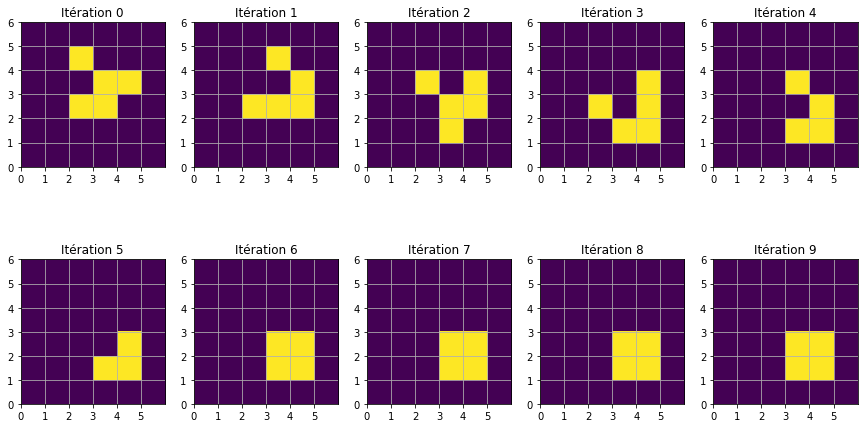

In [9]:
iterations(Z)


 itération i: représente la génération i+1, par exxemple l'itération 0 est la première génération après l'état initial.
 On constate qu'entre l'itération 0 et l'itération 3, les cellules convergent vers le coté droit ,en bas du graphe,on remarque aussi qu'à partir de l'tération 6 les cellules vivantes en jaunes gardent la même structure tout au long des générations qui suivent, et les quatres cellules vivantes sont collées l'une à coté de l'autre, ce qui veut dire que pour chaque cellule vivante on a trois cellules vivantes voisines, chose qui explique la convergence vers la même cellule, car pour chaque cellule vivante ayant 3 voisins vivants reste vivante à la génération suivante.
 
 
 

# ***Implémentation avec numpy:***

In [10]:
import numpy as np
vect = np.array([0,1,0,0,1,1])
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1] += (vect[:-2] + vect[2:])

In [11]:
nb_vect

array([0., 0., 1., 1., 1., 0.])

le nb_vect est un vecteur qui représente le nombre de voisins vivants de chaque cellule du vecteur ayant deux voisins, un à droite et l'autre à gauche, et on a le zéro toujours aux extrémités.

In [12]:
Z=np.asarray(Z)
def calcul_nb_voisins_np(Z):
    T= np.zeros_like(Z)
    for i in range(1, Z.shape[0]-1):
        for j in range(1, Z.shape[1]-1):
            T[i,j]+=Z[i,j-1]+Z[i,j+1]+Z[i-1,j-1]+Z[i-1,j]+Z[i-1,j+1]+Z[i+1,j-1]+Z[i+1,j]+Z[i+1,j+1]
    return T
            

   

In [13]:
calcul_nb_voisins_np(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 2, 0],
       [0, 0, 2, 3, 3, 0],
       [0, 0, 2, 3, 3, 0],
       [0, 0, 0, 0, 0, 0]])

In [14]:
def iteration_jeu_np(Z):
    # on affecte la matrice qui calcule le nombre de voisins à N.
    N=calcul_nb_voisins_np(Z)
    for i in range(1, Z.shape[0]-1):
        for j in range(1, Z.shape[1]-1):
            #Donne True si au moins un élément  est vrai. Faux est aussi donné dans le cas où c'est vide.
            # toute cellule vivante avec 2 ou 3 voisins vivants reste  vivante à la génération suivante, donc toute cellule vivante qui n'a pas 2 ou 3 voisins vivants devient morte.
            if (Z[i,j].any==1) and (N.any != 2 and N.any != 3):
                Z[i,j]=0
                # toute cellule morte ayant exactement 3 voisins vivants devient une cellule vivante.
            elif Z[i,j].any==0 and N.any == 3:
                Z[i,j]=1
    return Z

In [15]:
T=iteration_jeu_np(Z)
T

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [16]:
def jeu_np(Z_in, nb_iter):
    Z_apres=np.array(Z_in)
    for i in range (nb_iter):
        Z_apres=iteration_jeu(Z_in)
    return Z_apres

In [17]:
Z_in = np.array([[0,0,0,0,0,0],[0,0,0,1,0,0],[0,1,0,1,0,0],[0,0,1,1,0,0],[0,0,0,0,0,0], [0,0,0,0,0,0] ])
A=jeu_np(Z_in, 1)
print("La matrice Z_in après la première itération est : {}" .format(A))
B=jeu_np(Z_in,2)
print("La matrice Z_in après la deiscième itération est : {}" .format(B))


La matrice Z_in après la première itération est : [[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
La matrice Z_in après la deiscième itération est : [[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]]


In [18]:
Z_huge = np.zeros((100, 100)) 
Z_np = np.array( 
    [[0, 0, 0, 0, 0, 0], 
    [0, 0, 0, 1, 0, 0], 
     [0, 1, 0, 1, 0, 0], 
     [0, 0, 1, 1, 0, 0], 
     [0, 0, 0, 0, 0, 0], 
     [0, 0, 0, 0, 0, 0]]) 
Z_huge[10:16, 10:16] = Z_np


In [19]:
Z_huge[10:16, 10:16] 


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

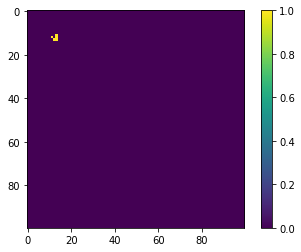

In [20]:
fig=plt.figure()
A=plt.imshow(Z_huge)
plt.colorbar()
plt.show()

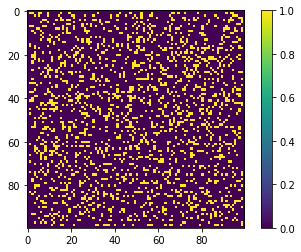

In [21]:
Z_huge=np.zeros((100,100))
Z=np.random.binomial( 1,(1 + ma_graine) * 10 / 100, size=(98,98))
Z_huge[1:np.shape(Z_huge)[1]-1,1:np.shape(Z_huge)[1]-1]=Z
fig=plt.figure()
A=plt.imshow(Z_huge)
plt.colorbar()
plt.show()


In [22]:
class JeuDeLaVie:
    
    def __init__(self, init_state, _time_T):
        self.init_state = init_state
        self._time_T = _time_T
        self._dimension = (n_1, n_2) = init_state.shape
        self._historic_state = np.zeros((n_1, n_2, _time_T+1))
        self._historic_state[:, :, 0] = self.init_state
        self.average_life = np.zeros((n_1, n_2))

    def play(self):
        t = 1
        while (t <= self._time_T):
            self._historic_state[:, :, t] = iteration_jeu_np(
                self._historic_state[:, :, t-1])
            self.average_life = np.mean(self._historic_state, axis=(2))
            t = t + 1

    def plot(self):
        plt.figure()
        plt.imshow(self.average_life)
        plt.title("Temps de vie moyen de chaque cellule")
        plt.colorbar()

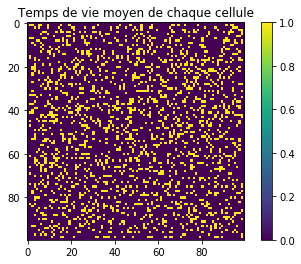

In [23]:
Survie_Ma_matrice = JeuDeLaVie(np.array(Z_huge), 50)
Survie_Ma_matrice.play()
Survie_Ma_matrice.plot()


In [29]:
fig = plt.imshow(Z_in)
    
def animate(nb_iters):
    fig.set_data(jeu_np(np.array(Z_in), nb_iters))
        return fig
gif = animation.FuncAnimation(plt.figure(), animate, frames=nb_iter)
return(gif)
plt.show()


mon_animation(Z_huge, 50)


IndentationError: unexpected indent (<ipython-input-29-5060d2dd649a>, line 5)